# Big Data Mart sales prediction

# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.The aim is to build a predictive model and find out the sales of each product at a particular store.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('bigdatamart_train.csv')

In [3]:
test_data=pd.read_csv('bigdatamart_test.csv')

In [4]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
df1=pd.DataFrame(train_data)

In [7]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


There are in total 8523 records and 12 columns where item_outler_sales is a target variable which is continuous in nature so it is problem of regression.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The feature named as item_identifier, item_fat_content ,item_type ,outlier_identifier ,Outlet_Size,Outlet_Location_Type, Outlet_Type are object datatype. Further, there are some Nan values in Item_Weight and Outlet_size.

In [9]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are total 1463 null values in Item_Weight and 2410 null values in Outlet_size.

<AxesSubplot:>

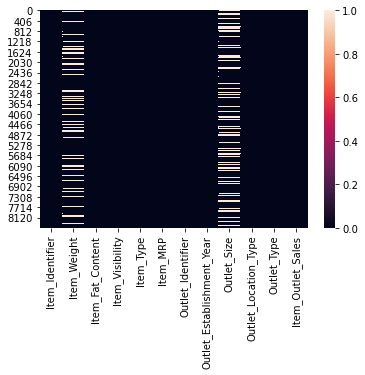

In [10]:
sns.heatmap(df1.isnull())

In [11]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The Item_Weight, Item_Visibility are having right tailed skewness as mean is greater than median. Further,the feature named as item_MRP is having left tail skewness as median is greater than mean.

Looking at the difference between 75% and max for feature named as Item_visibility it can be said there are outliers present which has be verified using boxplot.

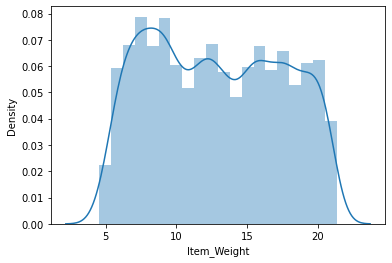

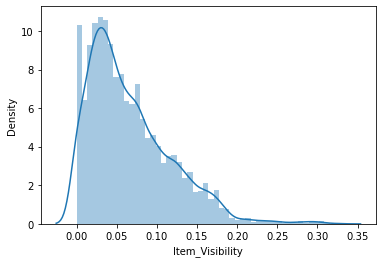

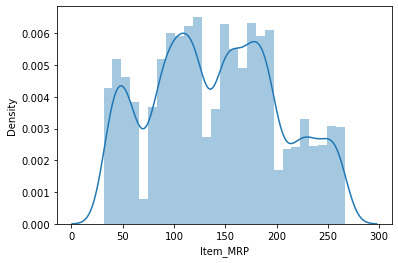

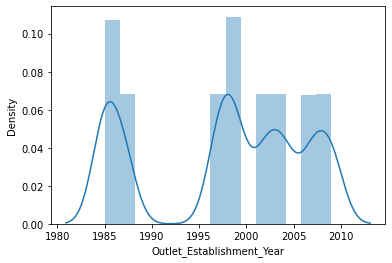

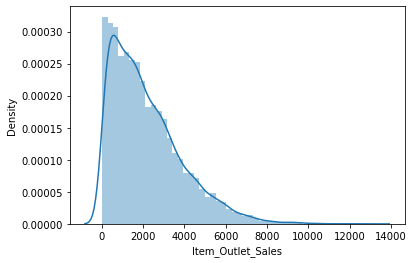

In [13]:
for i in df1.describe().columns:
    plt.figure()
    sns.distplot(df1[i])
    plt.show()

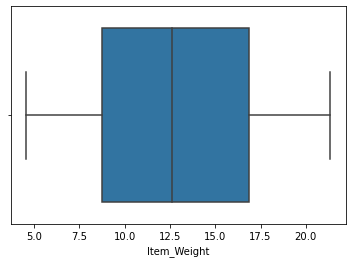

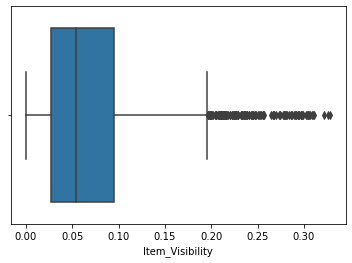

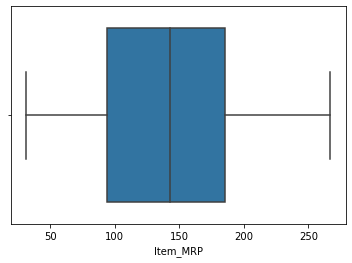

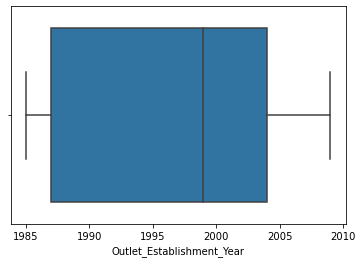

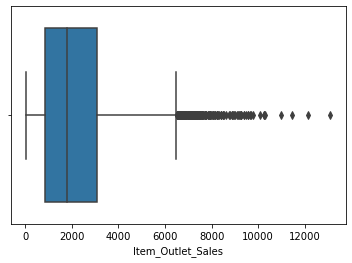

In [14]:
for i in df1.describe().columns:
    plt.figure()
    sns.boxplot(df1[i])
    plt.show()

There are presence of outliers in feature named as Item_Visibility.

In [17]:
df1['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCY18     9
FDP25     9
FDF52     9
         ..
FDQ60     1
DRF48     1
FDT35     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

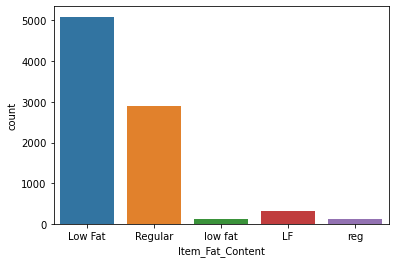

In [19]:
sns.countplot(df1['Item_Fat_Content'])

In [21]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat, LF and low fat mean the same thing so it will be replaced by LF so we will have only one category named as LF instead of three and the same goes for Regular which will be replaced by reg.

In [22]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace({"Low Fat":'LF',"low fat":'LF','Regular':'reg'})

In [23]:
df1['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

here are in total 5517 items having low fat and 3006 items are regular.

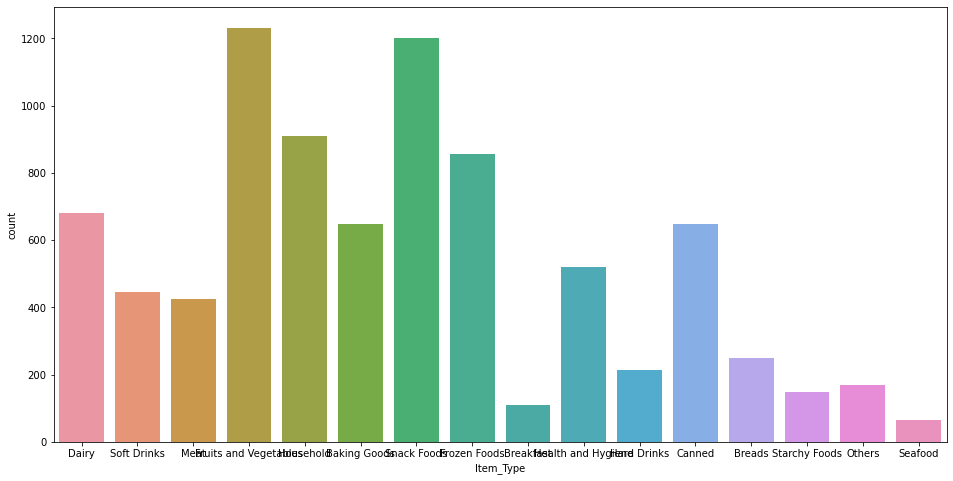

In [25]:
plt.figure(figsize=[16,8])
sns.countplot(df1['Item_Type'])
plt.show()

In [26]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There are 1232 items belongs to Fruits and Vegetables category item type , 1200 items belongs to Snacks Foods category item type.



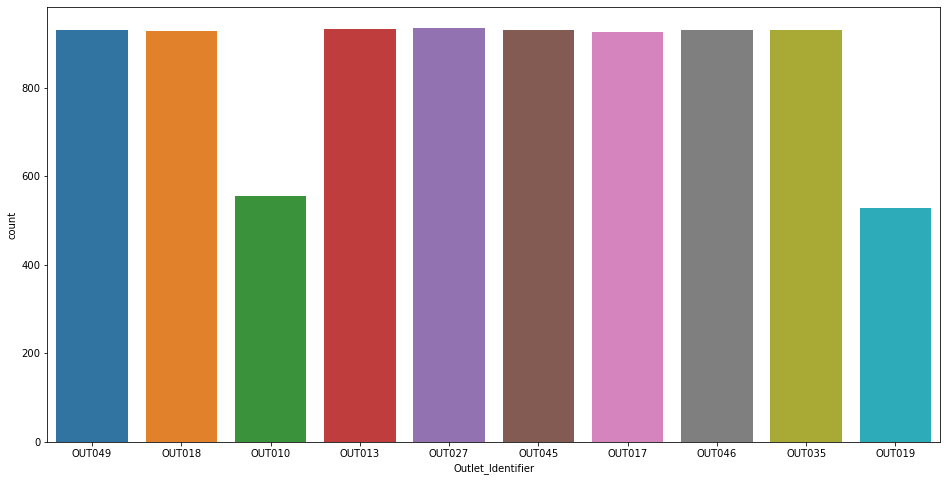

In [28]:
plt.figure(figsize=[16,8])
sns.countplot(df1['Outlet_Identifier'])
plt.show()

In [29]:
df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

There are 935 Outlets of OUT027 type, 932 Outlets of OUT013 type, and so on ...

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

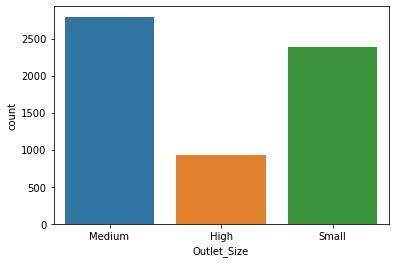

In [31]:
sns.countplot(df1['Outlet_Size'].dropna())

In [32]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are 2793 Outlets with medium Size ,2388 Oultet with Small size and 933 outlets are there with high size.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

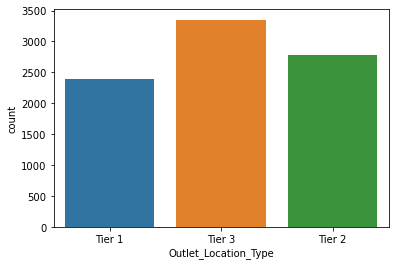

In [35]:
sns.countplot(df1['Outlet_Location_Type'])

In [36]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

There are 3350 outlets in Tier 3 cities, 2785 outlets in Tier 2 city and 2388 outlets in Tier 1 city.

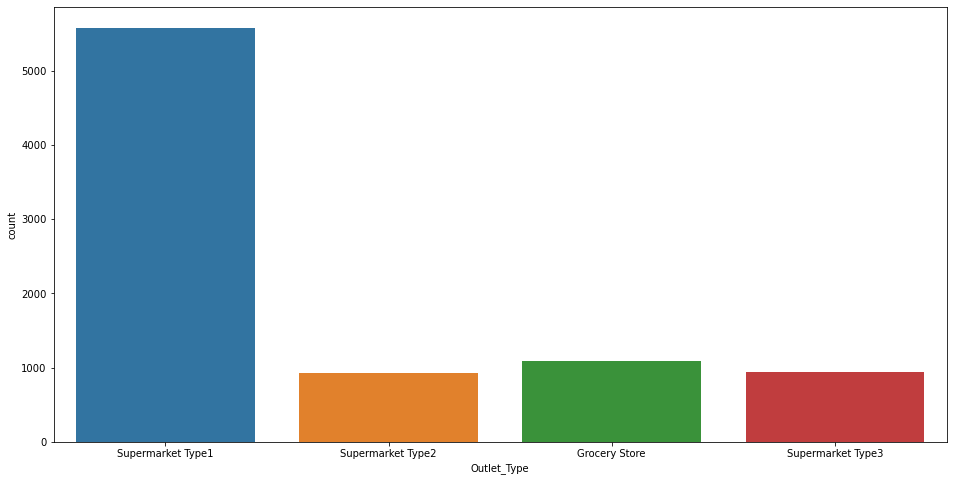

In [38]:
plt.figure(figsize=[16,8])
sns.countplot(df1['Outlet_Type'])
plt.show()

In [39]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

There are 5577 supermarket type 1 outlets,1083 Grocery Store ,935 Supermarket Type3 outlet and 928 Supermarket Type 2 outlets.

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

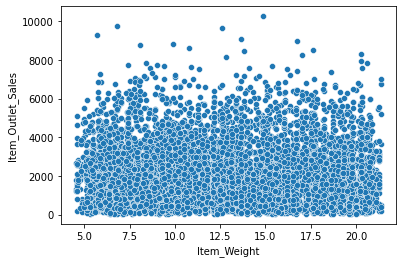

In [40]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df1)

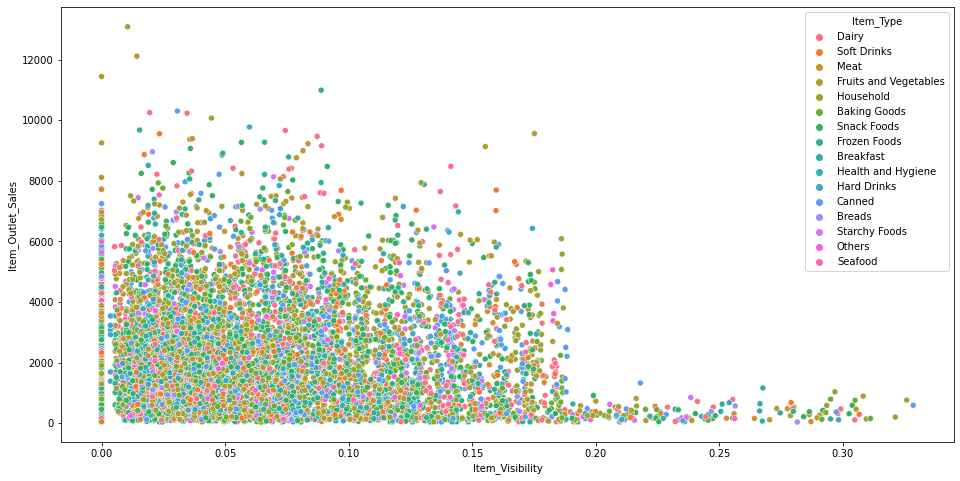

In [41]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=df1)
plt.show()

From the above scatterplot it can be said that as the item_visibility increases the item_outlet_Sales decreases.

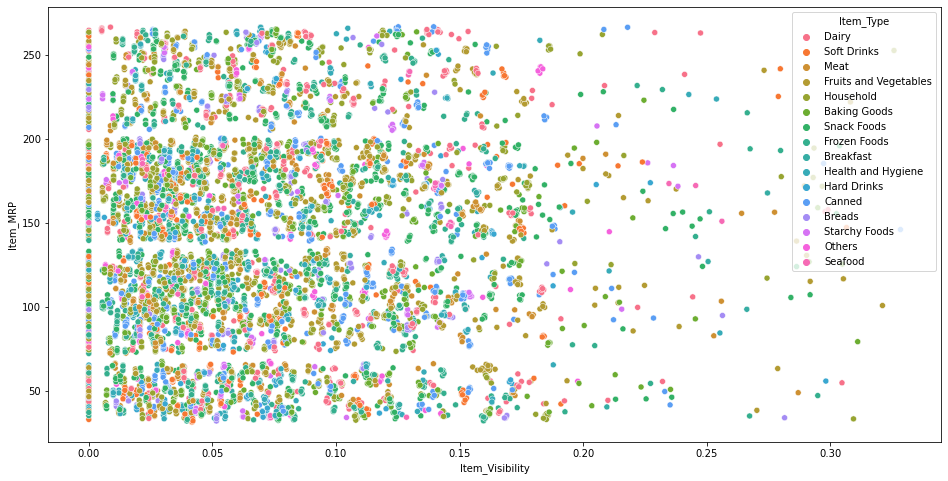

In [42]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='Item_Visibility',y='Item_MRP',hue='Item_Type',data=df1)
plt.show()

From the above graph it can be said that for Item_visibility is having continuous data in the range from 0.00 to 0.16. Further, the item visibility is zero which should not be there, say suppose if it is zero then it should not have any outlet_sales but in our case there is an outlet sales of 0 visible items.

In [43]:
df1.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)


,Item_Outlet_Sales
Outlet_Type,
Grocery Store,256.9988
Supermarket Type1,1990.7420
Supermarket Type2,1655.1788
Supermarket Type3,3364.9532


The Supermarket Type3 os having the highest oulet_sales as compared to peers.

In [44]:
df1.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)

,Item_Outlet_Sales
Outlet_Size,
High,2050.6640
Medium,2251.0698
Small,1544.6560


The Oultet_size medium is having highest item_outlet_sales as compared to peers.

In [45]:
df1.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc=np.median)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1487.3972
Tier 2,2004.0580
Tier 3,1812.3076


The Tier 2 Outlet_location_type is having highest item_outlet_sales as compared to peers.

In [47]:
df1.pivot_table(index='Item_Identifier',values='Item_Visibility',aggfunc=np.median)

,Item_Visibility
Item_Identifier,
DRA12,0.041012
DRA24,0.039990
DRA59,0.128027
DRB01,0.082171
DRB13,0.007055
...,...
NCZ30,0.026180
NCZ41,0.064409
NCZ42,0.011286


In [48]:
df1[df1['Item_Visibility']==0]['Item_Visibility'].count()

526

In [49]:
df2=df1.copy()

In [50]:
df3=df1.copy()

In [54]:
df3.loc[:,'Item_Visibility'].replace([0],[df3['Item_Visibility'].mean()],inplace=True)

In [55]:
sum(df1['Item_Visibility']==0)

526

In [56]:
sum(df3['Item_Visibility']==0)

0

In [58]:
df3['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
           ... 
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

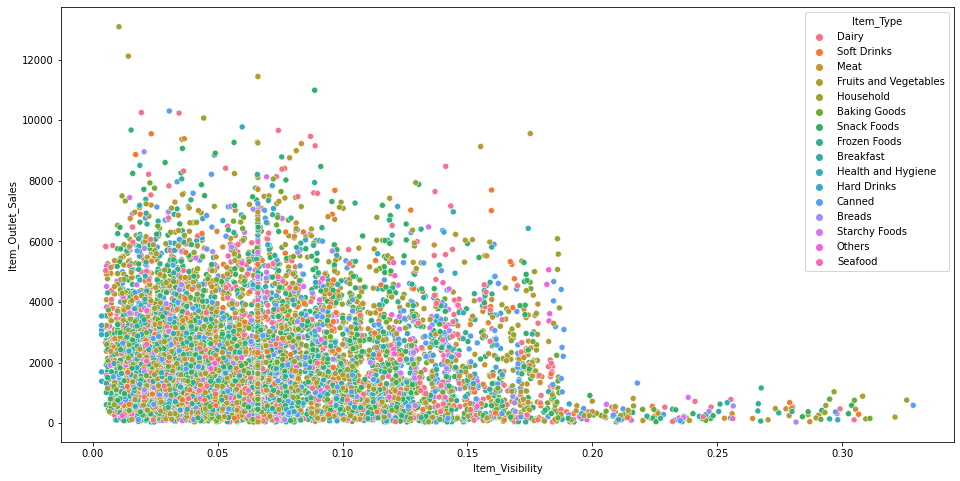

In [59]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=df3)
plt.show()

The zero vaules in item_visibility is replaced by the mean value of the column.

In [60]:
df3['Item_Weight'].fillna(df3['Item_Weight'].mean(),inplace=True)

In [61]:
df3['Outlet_Size'].fillna('Medium',inplace=True)

In [62]:
df3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 Have treated Nan values in Item_Weight and Outlet_Size.                

In [63]:
df3['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are outliers present in item_visibility but it's okay if it is not treated as they are close to whiskers.

Checking the Skewness in the numerical datatype.

In [64]:
df3.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
df3['Item_Visibility']=power_transform(df3['Item_Visibility'].values.reshape(-1,1))

In [67]:
df3.skew()

Item_Weight                  0.090561
Item_Visibility              0.132593
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

The skewness has been treated.

In [68]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,-1.449414,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,-1.319061,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,-1.420268,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.147136,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.147136,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,-0.091249,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,-0.367122,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,-0.738759,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,1.475341,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3['Item_Fat_Content']=le.fit_transform(df3['Item_Fat_Content'])
df3['Item_Type']=le.fit_transform(df3['Item_Type'])
df3['Outlet_Size']=le.fit_transform(df3['Outlet_Size'])
df3['Outlet_Location_Type']=le.fit_transform(df3['Outlet_Location_Type'])
df3['Outlet_Type']=le.fit_transform(df3['Outlet_Type'])

In [71]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,-1.449414,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,-1.319061,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,-1.420268,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.147136,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.147136,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,-0.091249,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,-0.367122,0,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,-0.738759,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,1.475341,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [73]:
df3.drop('Item_Identifier',axis=1,inplace=True)
df3.drop('Outlet_Identifier',axis=1,inplace=True)
df3.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [74]:
df3

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,-1.449414,4,249.8092,1,0,1,3735.1380
1,5.920,1,-1.319061,14,48.2692,1,2,2,443.4228
2,17.500,0,-1.420268,10,141.6180,1,0,1,2097.2700
3,19.200,1,0.147136,6,182.0950,1,2,0,732.3800
4,8.930,0,0.147136,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,-0.091249,13,214.5218,0,2,1,2778.3834
8519,8.380,1,-0.367122,0,108.1570,1,1,1,549.2850
8520,10.600,0,-0.738759,8,85.1224,2,1,1,1193.1136
8521,7.210,1,1.475341,13,103.1332,1,2,2,1845.5976


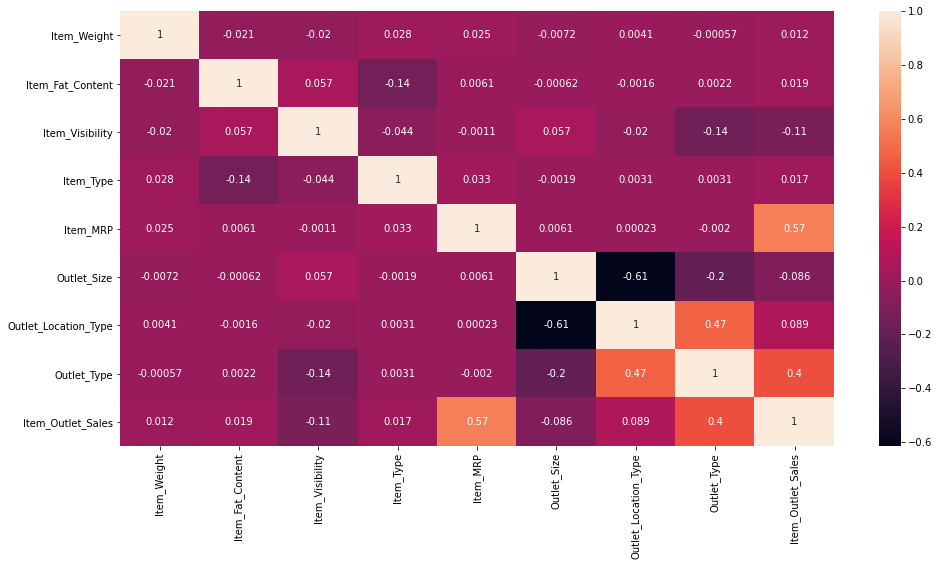

In [78]:
plt.figure(figsize=(16,8))
sns.heatmap(df3.corr(),annot=True)
plt.show()

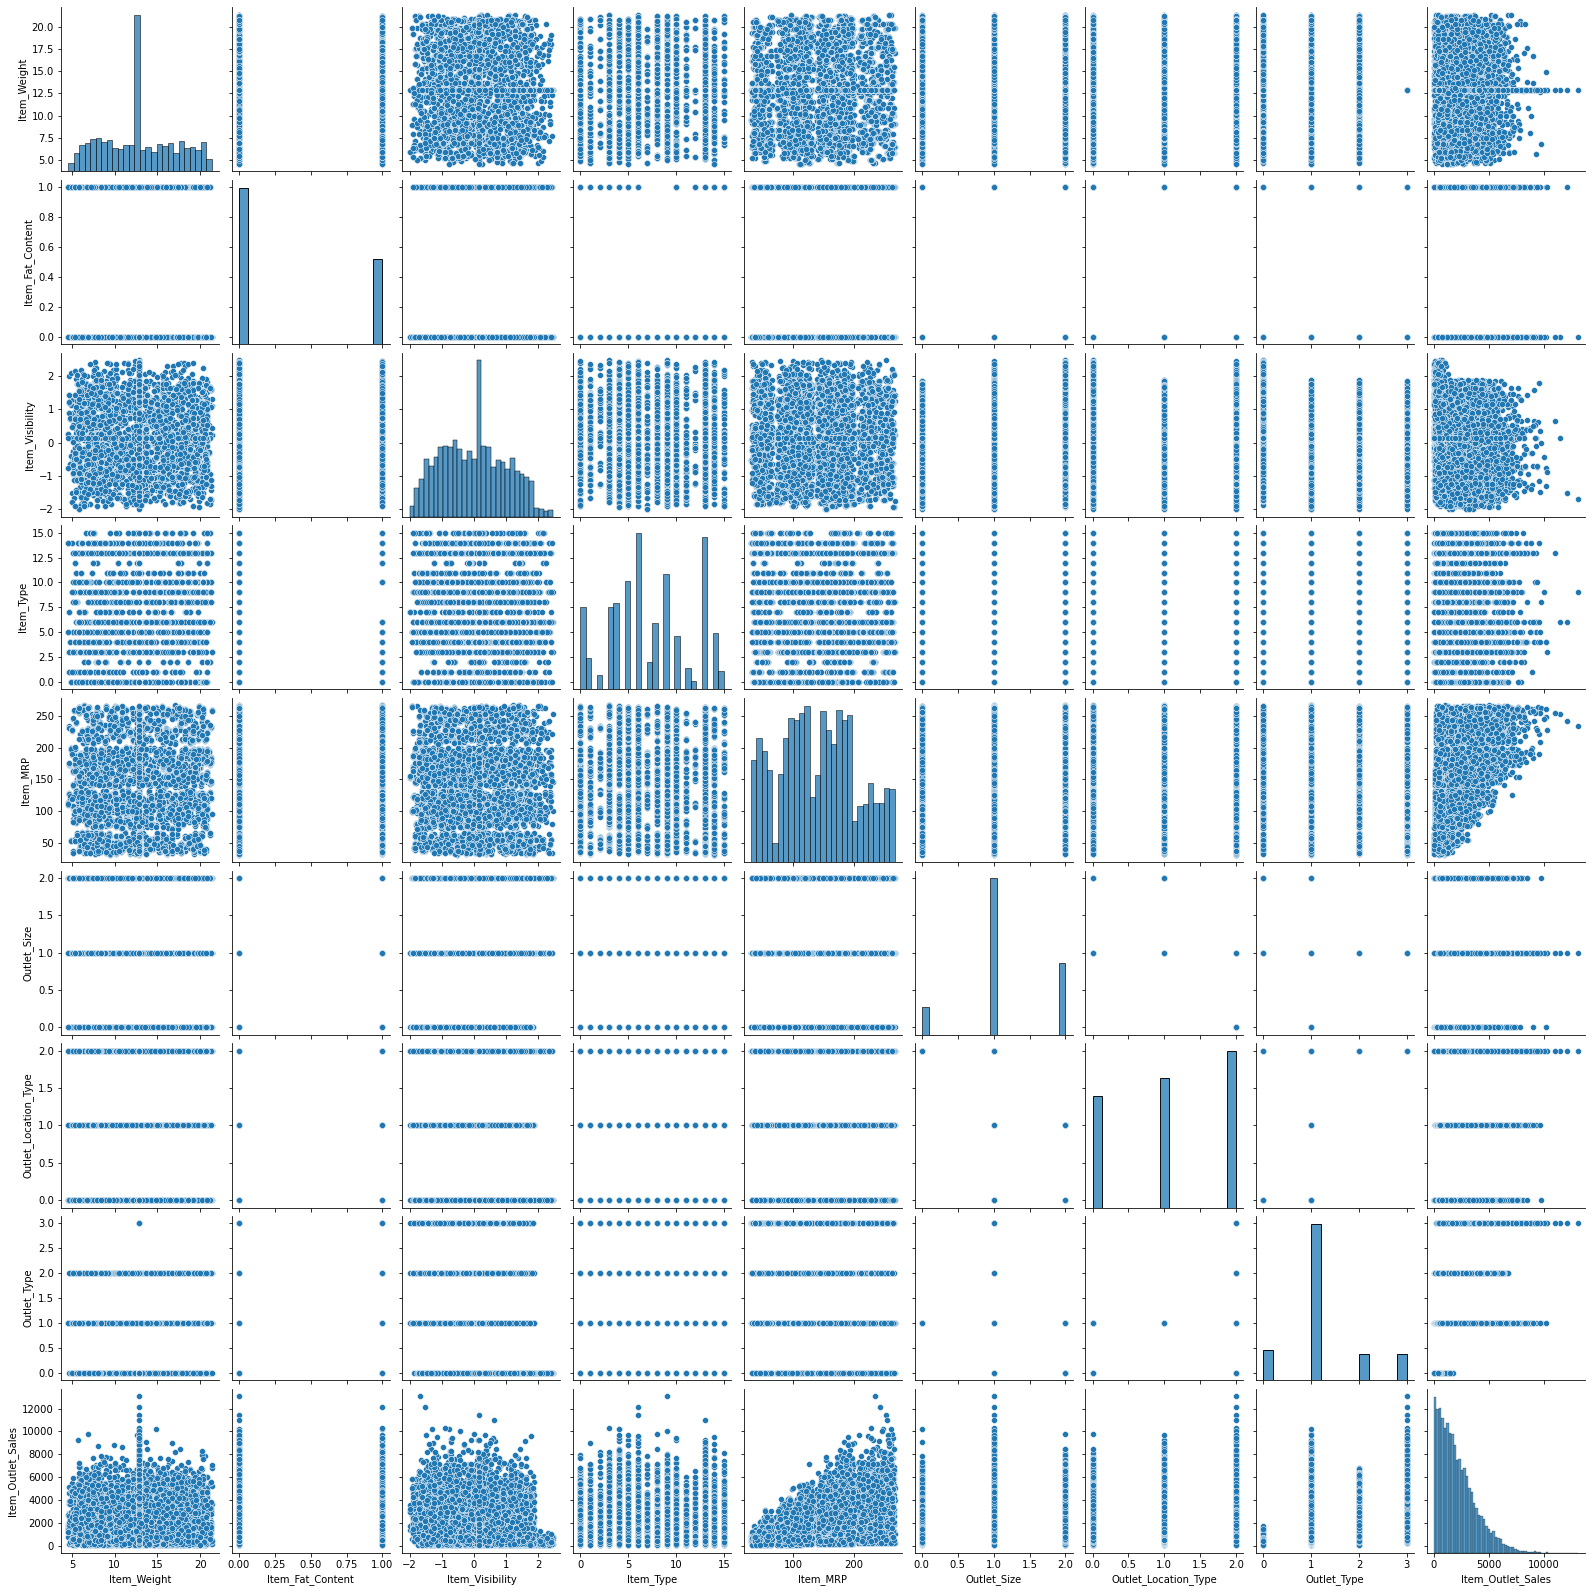

In [79]:
sns.pairplot(df3)

The item_Visibility is having negative correlation with item_outlet_sales. Further, the item_MRP is having positive linear correlation with Item_Outlet_Sales.

Will split the data in x_train,x_test,y_train,y_test.

In [75]:
x=df3.drop('Item_Outlet_Sales',axis=1)
y=df3['Item_Outlet_Sales']

In [76]:
se=StandardScaler()
x=se.fit_transform(x)

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [104]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))


856.0090161825409
1295208.988096426
1138.0724880676212
0.523464587044302


Text(0.5, 1.0, 'linear Regression')

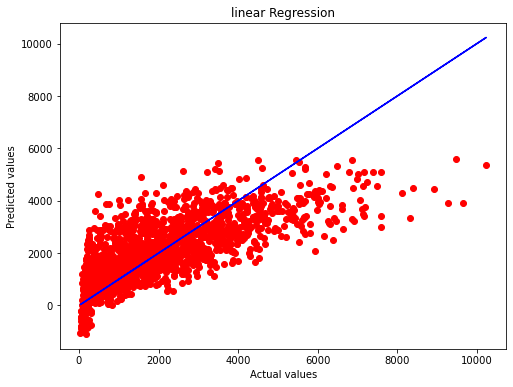

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("linear Regression")

From the graph it can be said the predicted values are far from actual values best fit line is not touching most of the predicted values, so underfitting is there which has to be treated using regularization.

In [112]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

1012.8274559530793
2100592.8973023477
1449.3422291861739
0.2271464196376798


In [113]:
svr=SVR()
svr.fit(x_train,y_train)
pred2=svr.predict(x_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

1185.4060637902953
2488818.530844676
1577.5989765604807
0.084309808480448


In [114]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred3=svr.predict(x_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(r2_score(y_test,pred3))

1185.4060637902953
2488818.530844676
1577.5989765604807
0.084309808480448


In [115]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred4=rf.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

764.7243492258062
1203695.6068606602
1097.130624338169
0.5571343402030186


In [123]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))


874.9522133921068
1299069.5061910346
1139.767303527801
0.5220442189019058


In [128]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred6=ada.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

874.9522133921068
1299069.5061910346
1139.767303527801
0.5220442189019058


Checking out the cross_val_Score of different models

In [116]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.5054336637055402


In [117]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score.mean())

0.15545979078418184


In [118]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svr,x,y,cv=5)
print(score.mean())

0.060609241193843075


In [121]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knr,x,y,cv=5)
print(score.mean())

0.5040912149857497


In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score.mean())

0.5406186278980435


In [129]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,x,y,cv=5)
print(score.mean())

0.4482946853361969


In [130]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gr,x,y,cv=5)
print(score.mean())

0.5932418887344071


# Checking out the r2_score using Lasso,Ridge, ElasticNet Regularization

In [147]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))


856.0089867521613
1295208.9501964103
1138.0724714166538
0.5234646009885378


In [142]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred8=ls.predict(x_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_squared_error(y_test,pred8)))
print(r2_score(y_test,pred8))


856.0089867521613
1295208.9501964103
1138.0724714166538
0.5234646009885378


In [150]:
en=ElasticNet(alpha=0.0001)
en.fit(x_train,y_train)
pred9=en.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))


856.0041464145329
1295207.7915798374
1138.0719623907082
0.5234650272686455


In [151]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ls,x,y,cv=5)
print(score.mean())

0.5054336658492163


In [152]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rd,x,y,cv=5)
print(score.mean())

0.5054336646162652


In [153]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(en,x,y,cv=5)
print(score.mean())

0.5054339728239029


Based on difference of  r2_score and cross_val_score Random Forest Regressor and Linear Regression is my best model. Further, hypertuning is required to find best model.

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [159]:
params={'max_depth': [10, 20, 30, 40, 50],'n_estimators': [200, 400, 600, 800, 1000],'max_features': ['auto', 'sqrt']}

In [162]:
rsc=RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1,cv=5)
rsc.fit(x_train,y_train)
rsc.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10}

In [163]:
rf=RandomForestRegressor(n_estimators=200,max_features='sqrt',max_depth=10)
rf.fit(x_train,y_train)
pred9=rf.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))


737.2920630012238
1069935.3077980806
1034.3767726501212
0.6063476485854329


In [172]:
params={'fit_intercept':['True','False']}

In [173]:
rsc=RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=5)
rsc.fit(x_train,y_train)
rsc.best_params_

{'fit_intercept': 'True'}

In [174]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
pred10=lr.predict(x_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))


856.0090161825409
1295208.988096426
1138.0724880676212
0.523464587044302


# Based on Hypertuning RandomForestRegressor is my best model with r2 score of 60%

In [175]:
import joblib

In [176]:
joblib.dump('rf','bigdatamart.obj')

['bigdatamart.obj']

In [177]:
joblib.load('bigdatamart.obj')

'rf'

# Will make predictions of  test bigdatamart dataset.

In [178]:
test_data=pd.read_csv('bigdatamart_test.csv')

In [179]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [180]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


From the above information it can be said there are Nan values in  Item_Weight  and Outlet_Size.

<AxesSubplot:>

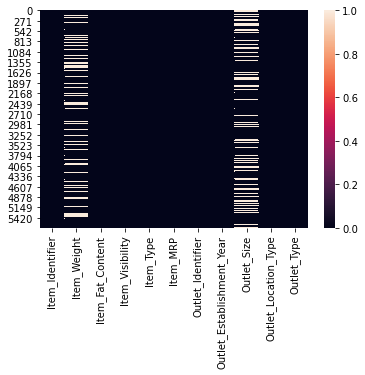

In [181]:
sns.heatmap(test_data.isnull())

In [182]:
df5=pd.DataFrame(test_data)

In [183]:
df5

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [184]:
df5.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


The Item_Visibility are having right tailed skewness as mean is greater than median. 

Looking at the difference between 75% and max for feature named as Item_visibility it can be said there are outliers present which has be verified using boxplot.

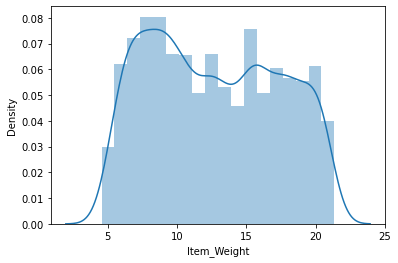

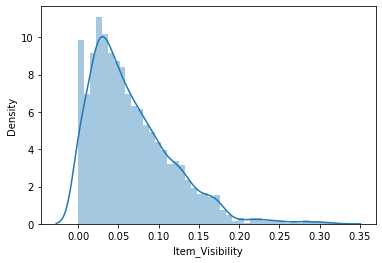

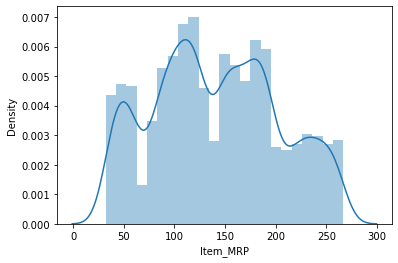

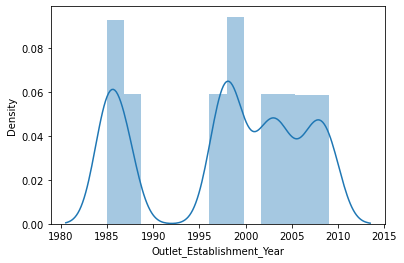

In [186]:
for i in df5.describe().columns:
    plt.figure()
    sns.distplot(df5[i])
    plt.show()

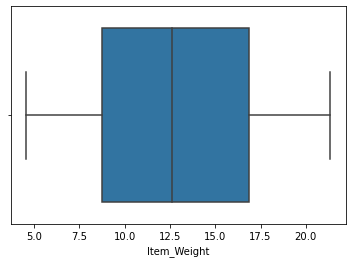

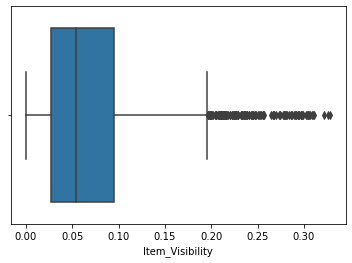

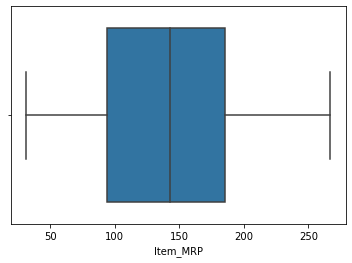

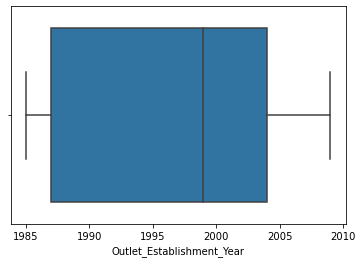

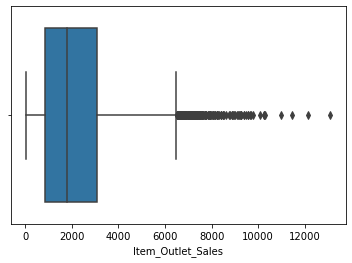

In [187]:
for i in df1.describe().columns:
    plt.figure()
    sns.boxplot(df1[i])
    plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

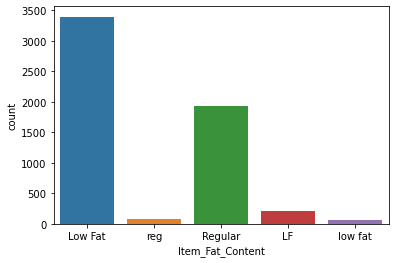

In [188]:
sns.countplot(df5['Item_Fat_Content'])

In [190]:
df5['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Low Fat, LF and low fat mean the same thing so it will be replaced by LF so we will have only one category named as LF instead of three and the same goes for Regular which will be replaced by reg.



In [192]:
df5['Item_Fat_Content']=df1['Item_Fat_Content'].replace({"Low Fat":'LF',"low fat":'LF','Regular':'reg'})

In [193]:
df5['Item_Fat_Content'].value_counts()

LF     3677
reg    2004
Name: Item_Fat_Content, dtype: int64

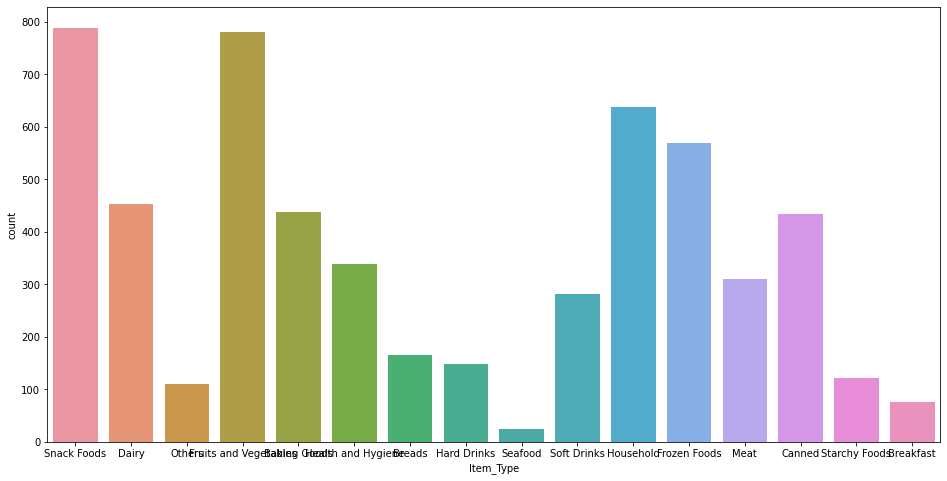

In [194]:
plt.figure(figsize=[16,8])
sns.countplot(df5['Item_Type'])
plt.show()

In [195]:
df5['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

There are 781 items belongs to Fruits and Vegetables category item type , 789 items belongs to Snacks Foods category item type and so on...


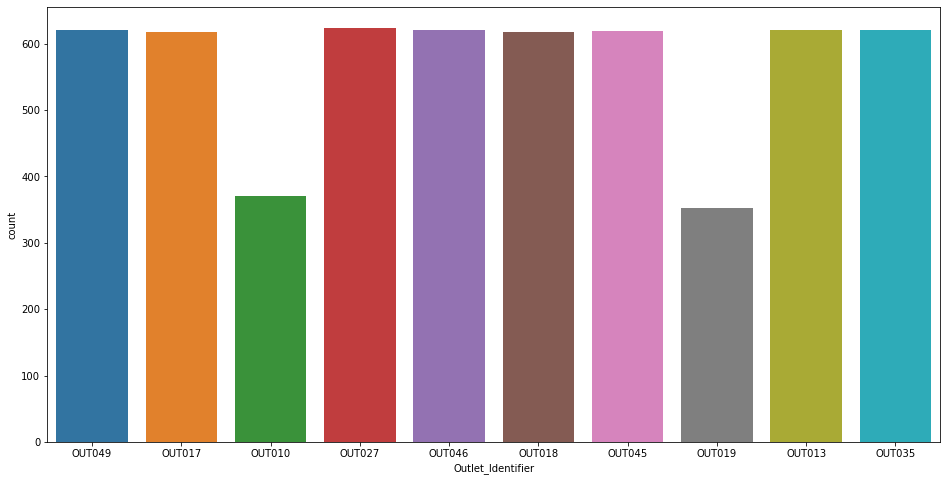

In [196]:
plt.figure(figsize=[16,8])
sns.countplot(df5['Outlet_Identifier'])
plt.show()

In [197]:
df5['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT035    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

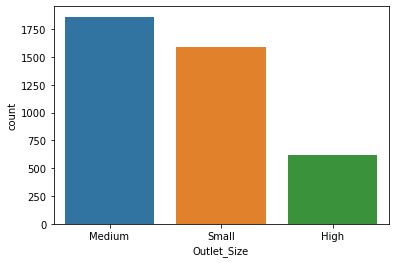

In [199]:
sns.countplot(df5['Outlet_Size'].dropna())

In [200]:
df5['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

There are 1862 Outlets with medium Size ,1592 Oultet with Small size and 621 outlets are there with high size.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

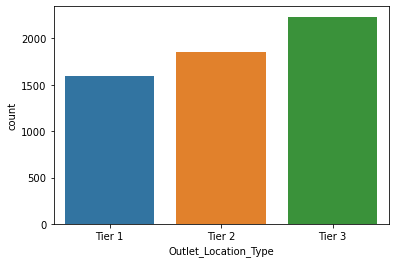

In [201]:
sns.countplot(df5['Outlet_Location_Type'])

In [202]:
df5['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

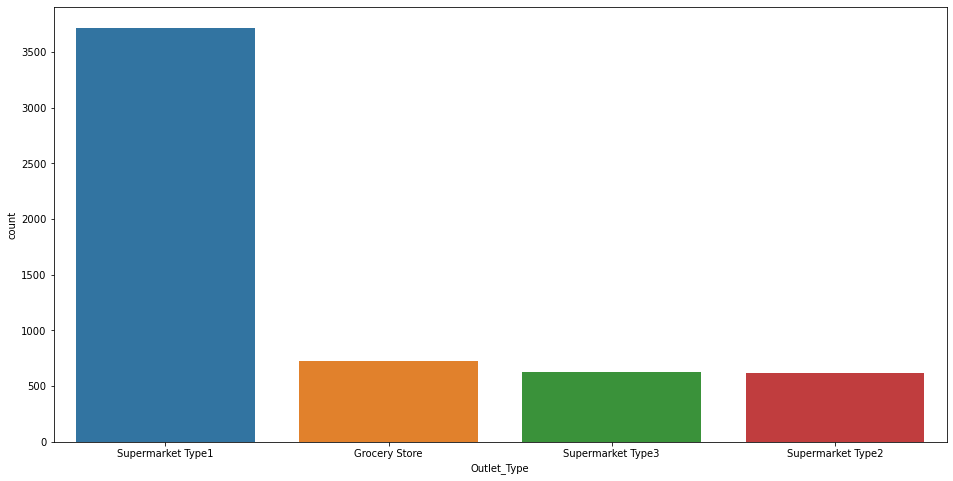

In [203]:
plt.figure(figsize=[16,8])
sns.countplot(df5['Outlet_Type'])
plt.show()

In [204]:
df5['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [205]:
df5[df5['Item_Visibility']==0]['Item_Visibility'].count()

353

In [206]:
df5.loc[:,'Item_Visibility'].replace([0],[df5['Item_Visibility'].mean()],inplace=True)

In [209]:
sum(df5['Item_Visibility']==0)

0

In [210]:
df5['Item_Weight'].fillna(df5['Item_Weight'].mean(),inplace=True)

In [211]:
df5['Outlet_Size'].fillna('Medium',inplace=True)

In [212]:
df5.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [213]:
df5['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

here are outliers present in item_visibility but it's okay if it is not treated as they are close to whiskers.

Checking the Skewness in the numerical datatype.

In [214]:
df5.skew()

Item_Weight                  0.142813
Item_Visibility              1.372659
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [215]:
from sklearn.preprocessing import power_transform
df5['Item_Visibility']=power_transform(df5['Item_Visibility'].values.reshape(-1,1))

In [216]:
df5.skew()

Item_Weight                  0.142813
Item_Visibility              0.125714
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [218]:
le=LabelEncoder()
df5['Item_Fat_Content']=le.fit_transform(df5['Item_Fat_Content'])
df5['Item_Type']=le.fit_transform(df5['Item_Type'])
df5['Outlet_Size']=le.fit_transform(df5['Outlet_Size'])
df5['Outlet_Location_Type']=le.fit_transform(df5['Outlet_Location_Type'])
df5['Outlet_Type']=le.fit_transform(df5['Outlet_Type'])

In [219]:
df5.drop('Item_Identifier',axis=1,inplace=True)
df5.drop('Outlet_Identifier',axis=1,inplace=True)
df5.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [220]:
df5

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,-1.837545,13,107.8622,1,0,1
1,8.300000,1,-0.632250,4,87.3198,1,1,1
2,14.600000,0,0.854450,11,241.7538,1,2,0
3,7.315000,1,-1.492832,13,155.0340,1,1,1
4,12.695633,0,1.157117,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500000,0,-1.573508,13,141.3154,2,0,1
5677,7.600000,0,1.470521,15,169.1448,1,2,2
5678,10.000000,1,0.333515,8,118.7440,1,1,1
5679,15.300000,0,0.147335,3,214.6218,1,1,1


In [221]:
x=df5

In [222]:
se=StandardScaler()
x=se.fit_transform(x)

In [223]:
prediction=rf.predict(x)

In [224]:
print(prediction)

[1831.8002803  1454.61543096  953.51945583 ... 1813.5740056  3402.57770641
 1436.85858825]


In [226]:
df5['Item_outlet_Sales']=prediction

In [227]:
df5

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_outlet_Sales
0,20.750000,0,-1.837545,13,107.8622,1,0,1,1831.800280
1,8.300000,1,-0.632250,4,87.3198,1,1,1,1454.615431
2,14.600000,0,0.854450,11,241.7538,1,2,0,953.519456
3,7.315000,1,-1.492832,13,155.0340,1,1,1,2564.683147
4,12.695633,0,1.157117,4,234.2300,1,2,3,5703.885012
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0,-1.573508,13,141.3154,2,0,1,1918.381984
5677,7.600000,0,1.470521,15,169.1448,1,2,2,2499.620882
5678,10.000000,1,0.333515,8,118.7440,1,1,1,1813.574006
5679,15.300000,0,0.147335,3,214.6218,1,1,1,3402.577706


# The prediction is completed by using randomforestRegressor which is the best model.